In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Few Notebooks

https://github.com/EssamQabel/Analyzing-Rhode-Island-Police-Activity

https://github.com/BenceToth/dc_police-activity

In [56]:
ri = pd.read_csv('C:/Users/Chaitanya/Desktop/ML - Coursera/DataCamp/Projects/Analyzing Police Activity/Police stops in Rhode Island.csv')
ri.head()

,state,stop_date,stop_time,county_name,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
0,RI,2005-01-04,12:55,NaN,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4
1,RI,2005-01-23,23:15,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2,RI,2005-02-17,04:15,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4
3,RI,2005-02-20,17:15,NaN,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1
4,RI,2005-02-24,01:20,NaN,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3


In [57]:
#Initial Analysis
print(ri.shape)
ri.isnull().sum()

(91741, 15)


state                     0
stop_date                 0
stop_time                 0
county_name           91741
driver_gender          5205
driver_race            5202
violation_raw          5202
violation              5202
search_conducted          0
search_type           88434
stop_outcome           5202
is_arrested            5202
stop_duration          5202
drugs_related_stop        0
district                  0
dtype: int64

In [58]:
# Drop the 'county_name' and 'state' columns
ri.drop(['county_name', 'state'], axis='columns', inplace=True)
print(ri.isnull().sum())

stop_date                 0
stop_time                 0
driver_gender          5205
driver_race            5202
violation_raw          5202
violation              5202
search_conducted          0
search_type           88434
stop_outcome           5202
is_arrested            5202
stop_duration          5202
drugs_related_stop        0
district                  0
dtype: int64


In [59]:
# Drop all rows that are missing 'driver_gender'
ri.dropna(subset=['driver_gender'], inplace=True)
print(ri.isnull().sum())

stop_date                 0
stop_time                 0
driver_gender             0
driver_race               0
violation_raw             0
violation                 0
search_conducted          0
search_type           83229
stop_outcome              0
is_arrested               0
stop_duration             0
drugs_related_stop        0
district                  0
dtype: int64


### No missing values in the dataset

In [60]:
ri.head()

,stop_date,stop_time,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
0,2005-01-04,12:55,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4
1,2005-01-23,23:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2,2005-02-17,04:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4
3,2005-02-20,17:15,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1
4,2005-02-24,01:20,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3


After initial analysis you can see that the 'search_conducted', 'is_arrested' & 'drugs_related_stop' columns may contain True/False values and driver_gender may contain M/F values and 'driver_race' contains related to race. 
We will find unique value in every of the above columns and convert them to categorical or boolean data type wherever feasible.

In [61]:
print(ri.is_arrested.dtype)
print(ri.is_arrested.unique())

object
[False True]


In [62]:
# Change the data type of 'is_arrested' to 'bool'
ri['is_arrested'] = ri.is_arrested.astype('bool')
print(ri.is_arrested.dtype)

bool


In [63]:
print(ri.search_conducted.dtype)
print(ri.search_conducted.unique())

bool
[False  True]


In [64]:
# Change the data type of 'search_conducted' to 'bool'
ri['search_conducted'] = ri.search_conducted.astype('bool')
print(ri.search_conducted.dtype)

bool


In [65]:
print(ri.drugs_related_stop.dtype)
print(ri.drugs_related_stop.unique())

bool
[False  True]


In [66]:
# Change the data type of 'drugs_related_stop' to 'bool'
ri['drugs_related_stop'] = ri.drugs_related_stop.astype('bool')
print(ri.drugs_related_stop.dtype)

bool


In [67]:
# We can to all the above process in a single run
print(ri[['is_arrested', 'search_conducted', 'drugs_related_stop']].dtypes)
print(pd.unique(ri[['is_arrested', 'search_conducted', 'drugs_related_stop']].values.ravel()))

is_arrested           bool
search_conducted      bool
drugs_related_stop    bool
dtype: object
[False  True]


In [94]:
print(ri.driver_gender.unique())
print(ri.driver_race.unique())

cat1 = ri.driver_gender.unique()
cat2 = ri.driver_race.unique()

ri['driver_gender'] = ri.driver_gender.astype('category', categories = cat1)
ri['driver_race'] = ri.driver_race.astype('category', categories = cat2)

print(ri.driver_gender.dtype)
print(ri.driver_race.dtype)

['M' 'F']
['White' 'Asian' 'Black' 'Hispanic' 'Other']
category
category


C:\Users\Chaitanya\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3325: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  exec(code_obj, self.user_global_ns, self.user_ns)


In [68]:
# Concatenate 'stop_date' and 'stop_time' (separated by a space)
combined = ri.stop_date.str.cat(ri['stop_time'], sep=" ")

# Convert 'combined' to datetime format
ri['stop_datetime'] = pd.to_datetime(combined)

ri.dtypes

stop_date                     object
stop_time                     object
driver_gender                 object
driver_race                   object
violation_raw                 object
violation                     object
search_conducted                bool
search_type                   object
stop_outcome                  object
is_arrested                     bool
stop_duration                 object
drugs_related_stop              bool
district                      object
stop_datetime         datetime64[ns]
dtype: object

In [69]:
# Set 'stop_datetime' as the index
ri.set_index('stop_datetime', inplace=True)

In [70]:
ri.head(3)

,stop_date,stop_time,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
stop_datetime,,,,,,,,,,,,,
2005-01-04 12:55:00,2005-01-04,12:55,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4
2005-01-23 23:15:00,2005-01-23,23:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2005-02-17 04:15:00,2005-02-17,04:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4


In [71]:
#We can drop stop_date and stop_time columns
ri.drop(['stop_date', 'stop_time'], axis='columns', inplace=True)

In [73]:
# Create a DataFrame of female drivers
female = ri[ri.driver_gender == 'F']

# Create a DataFrame of male drivers
male = ri[ri.driver_gender == 'M']

# Compute the violations by female drivers (as proportions)
print(female.violation.value_counts(normalize=True))

# Compute the violations by male drivers (as proportions)
print(male.violation.value_counts(normalize=True))

Speeding               0.658114
Moving violation       0.138218
Equipment              0.105199
Registration/plates    0.044418
Other                  0.029738
Seat belt              0.024312
Name: violation, dtype: float64
Speeding               0.522243
Moving violation       0.206144
Equipment              0.134158
Other                  0.058985
Registration/plates    0.042175
Seat belt              0.036296
Name: violation, dtype: float64


In [74]:
# Female that are arrested
f_arrest = ri[(ri.driver_gender == 'F') & (ri.is_arrested == True)]
f_speed = ri[(ri.driver_gender == 'F') & (ri.violation == 'Speeding')]
print(f_arrest.shape)
print(f_speed.shape)

(669, 11)
(15646, 11)


In [75]:
# Compute the stop outcomes for female drivers (as proportions)
print(f_speed.stop_outcome.value_counts(normalize = True))

Citation            0.952192
Warning             0.040074
Arrest Driver       0.005752
N/D                 0.000959
Arrest Passenger    0.000639
No Action           0.000383
Name: stop_outcome, dtype: float64


In [76]:
print(ri.groupby(['driver_gender']).search_conducted.mean())

driver_gender
F    0.019181
M    0.045426
Name: search_conducted, dtype: float64


In [77]:
print(ri.groupby(['violation','driver_gender']).search_conducted.mean())

violation            driver_gender
Equipment            F                0.039984
                     M                0.071496
Moving violation     F                0.039257
                     M                0.061524
Other                F                0.041018
                     M                0.046191
Registration/plates  F                0.054924
                     M                0.108802
Seat belt            F                0.017301
                     M                0.035119
Speeding             F                0.008309
                     M                0.027885
Name: search_conducted, dtype: float64


In [78]:
print(ri.search_type.unique())

[nan 'Probable Cause' 'Incident to Arrest'
 'Incident to Arrest,Probable Cause' 'Protective Frisk'
 'Probable Cause,Protective Frisk,Reasonable Suspicion'
 'Reasonable Suspicion' 'Incident to Arrest,Protective Frisk'
 'Inventory,Protective Frisk' 'Inventory' 'Incident to Arrest,Inventory'
 'Inventory,Probable Cause' 'Protective Frisk,Reasonable Suspicion'
 'Probable Cause,Reasonable Suspicion'
 'Incident to Arrest,Inventory,Protective Frisk'
 'Probable Cause,Protective Frisk'
 'Incident to Arrest,Probable Cause,Protective Frisk'
 'Incident to Arrest,Inventory,Probable Cause'
 'Incident to Arrest,Inventory,Reasonable Suspicion'
 'Incident to Arrest,Reasonable Suspicion'
 'Incident to Arrest,Protective Frisk,Reasonable Suspicion'
 'Inventory,Protective Frisk,Reasonable Suspicion'
 'Incident to Arrest,Probable Cause,Reasonable Suspicion'
 'Inventory,Probable Cause,Reasonable Suspicion'
 'Inventory,Probable Cause,Protective Frisk'
 'Inventory,Reasonable Suspicion']


In [80]:
# Check if 'search_type' contains the string 'Protective Frisk'
ri['frisk'] = ri.search_type.str.contains('Protective Frisk', na=False)

# Create a DataFrame of stops in which a search was conducted
searched = ri[ri.search_conducted == True]

# Calculate the overall frisk rate by taking the mean of 'frisk'
print(searched.frisk.mean())

# Calculate the frisk rate for each gender
print(searched.groupby('driver_gender')['frisk'].mean())

0.09162382824312065
driver_gender
F    0.074561
M    0.094353
Name: frisk, dtype: float64


In [81]:
# Calculate the hourly arrest rate
hourly_arrest_rate = ri.groupby(ri.index.hour).is_arrested.mean()

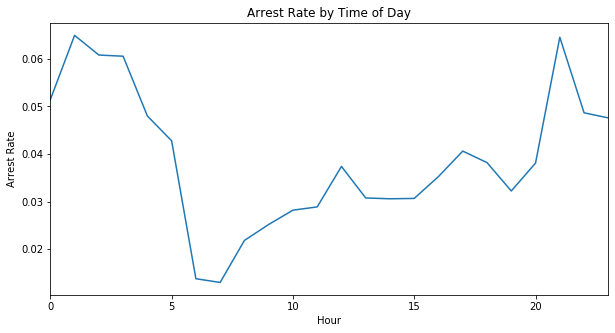

In [83]:
# Create a line plot of 'hourly_arrest_rate'
hourly_arrest_rate.plot(figsize=(10,5))

# Add the xlabel, ylabel, and title
plt.xlabel('Hour')
plt.ylabel('Arrest Rate')
plt.title('Arrest Rate by Time of Day')

# Display the plot
plt.show()

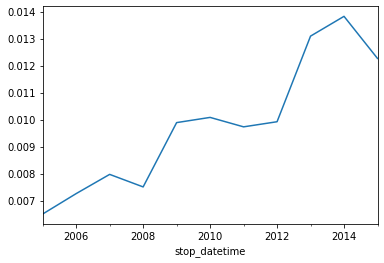

In [85]:
# Save the annual rate of drug-related stops
annual_drug_rate = ri.drugs_related_stop.resample('A').mean()

# Create a line plot of 'annual_drug_rate'
annual_drug_rate.plot()

# Display the plot
plt.show()

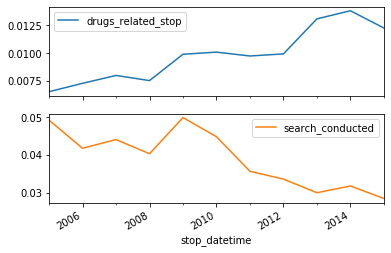

In [86]:
# Calculate and save the annual search rate
annual_search_rate = ri.search_conducted.resample('A').mean()

# Concatenate 'annual_drug_rate' and 'annual_search_rate'
annual = pd.concat([annual_drug_rate, annual_search_rate], axis='columns')

# Create subplots from 'annual'
annual.plot(subplots = True)

# Display the subplots
plt.show()

In [87]:
# Create a frequency table of districts and violations & Save the frequency table as 'all_zones'
all_zones = pd.crosstab(ri['district'], ri['violation'])

# Select rows 'Zone K1' through 'Zone K3' & Save the smaller table as 'k_zones'
k_zones = all_zones.loc['Zone K1':'Zone K3']

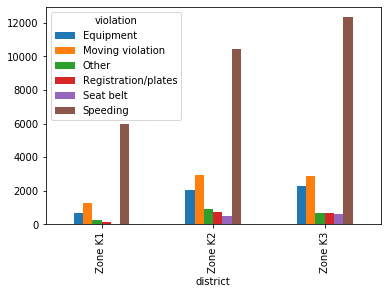

In [88]:
# Create a bar plot of 'k_zones'
k_zones.plot(kind='bar')

# Display the plot
plt.show()

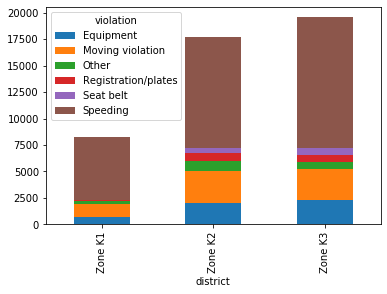

In [89]:
# Create a stacked bar plot of 'k_zones'
k_zones.plot(kind='bar',  stacked=True)

# Display the plot
plt.show()

In [90]:
# Print the unique values in 'stop_duration'
print(ri.stop_duration.unique())

# Create a dictionary that maps strings to integers
mapping = {'0-15 Min': 8, '16-30 Min':23, '30+ Min':45}

# Convert the 'stop_duration' strings to integers using the 'mapping'
ri['stop_minutes'] = ri.stop_duration.map(mapping)

# Print the unique values in 'stop_minutes'
print(ri.stop_minutes.unique())

['0-15 Min' '16-30 Min' '30+ Min']
[ 8 23 45]


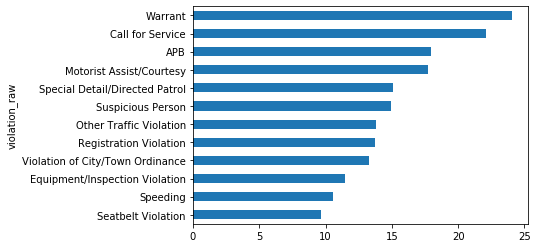

In [92]:
# Calculate the mean 'stop_minutes' for each value in 'violation_raw' & Save the resulting Series as 'stop_length'
stop_length = ri.groupby('violation_raw')['stop_minutes'].mean()

# Sort 'stop_length' by its values and create a horizontal bar plot
stop_length.sort_values().plot(kind='barh')

# Display the plot
plt.show()